In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:/DATA_SCIENCE/DS_Machinelearning/Student_Performance_multiple_linear_regression.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
encoded_data = pd.get_dummies(df).astype(int)

In [6]:
encoded_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91,0,1
1,4,82,4,2,65,1,0
2,8,51,7,2,45,0,1
3,5,52,5,2,36,0,1
4,7,75,8,5,66,1,0


In [7]:
encoded_data.isna()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False


In [8]:
encoded_data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities_No       0
Extracurricular Activities_Yes      0
dtype: int64

In [9]:
encoded_data.drop(columns=["Extracurricular Activities_No"], inplace=True)

In [10]:
encoded_data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91,1
1,4,82,4,2,65,0
2,8,51,7,2,45,1
3,5,52,5,2,36,1
4,7,75,8,5,66,0


In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X = encoded_data[["Hours Studied","Previous Scores","Sleep Hours","Sample Question Papers Practiced","Extracurricular Activities_Yes"]]
y = encoded_data["Performance Index"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
y_test

6252    51
4684    20
1731    46
4742    28
4521    41
        ..
6412    45
8285    66
7853    16
1095    65
6929    47
Name: Performance Index, Length: 2000, dtype: int32

In [15]:
from sklearn.linear_model import LinearRegression #It is applicable to simple as well as multiple
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred = regressor.predict(X_train)
y_pred

array([34.47064278, 25.69665091, 57.88131903, ..., 45.05542174,
       21.02145642, 22.57711635])

In [17]:
y_train

9254    36
1561    25
1670    59
6087    22
6669    40
        ..
5734    48
5191    51
5390    44
860     20
7270    24
Name: Performance Index, Length: 8000, dtype: int32

In [18]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train,y_pred)

In [19]:
mse

4.169735849525008

In [20]:
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_train)
mse = mean_squared_error(y_train,y_pred)
mse

4.169735849525008

In [21]:
from sklearn.metrics import mean_absolute_error
y_pred = regressor.predict(X_train)
mse = mean_absolute_error(y_train,y_pred)
mse

1.619305483033428

In [22]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_train)
mse = r2_score(y_train,y_pred)
mse

0.9886898790682355

ValueError: x and y must have same first dimension, but have shapes (2000,) and (8000,)

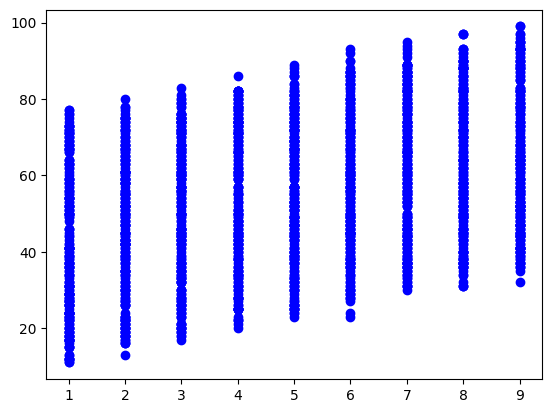

In [40]:

plt.scatter(X_test['Hours Studied'], y_test, color='blue')
plt.plot(X_test['Hours Studied'], y_pred, color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Regression Line on Scatter Plot")
plt.show()


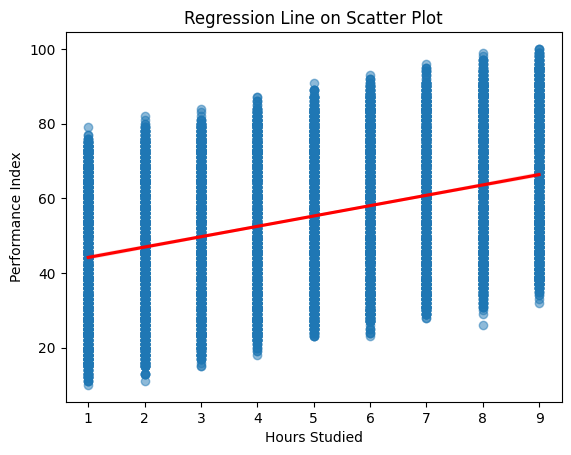

In [30]:
sns.regplot(x=encoded_data["Hours Studied"], y=encoded_data["Performance Index"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.title("Regression Line on Scatter Plot")

plt.show()